In [1]:
from mongo_connection import Mongo_connection
import numpy as np
import pandas as pd
import itertools
import pair_transition_analysis
import granger_causation_test
from matplotlib import pyplot as plt
from collections import defaultdict
import roi_config
import fixation
import hypothesis_testing
import bulk_run
import anova


[INFO] Created a mongodb instance.
[INFO] Currently connected to eye_tracking_db/fixation_sequences.
[INFO] Found 88 documents.


In [2]:
mongo = Mongo_connection()
mongo.connect()

[INFO] Created a mongodb instance.
[INFO] Currently connected to eye_tracking_db/fixation_sequences.
[INFO] Found 88 documents.


In [2]:
df_dwell = bulk_run.run_dwell_stats(trial=2)

trial: 2, group: 2, pID: 001
trial: 2, group: 2, pID: 002
trial: 2, group: 1, pID: 003
trial: 2, group: 1, pID: 004
trial: 2, group: 2, pID: 005
trial: 2, group: 2, pID: 006
trial: 2, group: 1, pID: 007
trial: 2, group: 1, pID: 008
trial: 2, group: 2, pID: 009
trial: 2, group: 1, pID: 010
trial: 2, group: 2, pID: 011
trial: 2, group: 2, pID: 014
trial: 2, group: 2, pID: 015
trial: 2, group: 2, pID: 016
trial: 2, group: 2, pID: 017
trial: 2, group: 2, pID: 019
trial: 2, group: 2, pID: 020
trial: 2, group: 2, pID: 021
trial: 2, group: 2, pID: 022
trial: 2, group: 1, pID: 023
trial: 2, group: 2, pID: 025
trial: 2, group: 1, pID: 027
trial: 2, group: 1, pID: 029
trial: 2, group: 1, pID: 032


In [5]:
df_basic_metrics = bulk_run.run_basic_metrics(trial=2)

trial: 2, group: 2, pID: 001
trial: 2, group: 2, pID: 002
trial: 2, group: 1, pID: 003
trial: 2, group: 1, pID: 004
trial: 2, group: 2, pID: 005
trial: 2, group: 2, pID: 006
trial: 2, group: 1, pID: 007
trial: 2, group: 1, pID: 008
trial: 2, group: 2, pID: 009
trial: 2, group: 1, pID: 010
trial: 2, group: 2, pID: 011
trial: 2, group: 2, pID: 014
trial: 2, group: 2, pID: 015


D:\workspace\eye-tracking-in-aviation\bulk_run.py:47: RuntimeWarning: divide by zero encountered in log2
  Ht += -sum(pA[k]*(np.nan_to_num(m[k]*np.log2(m[k]))))
D:\workspace\eye-tracking-in-aviation\bulk_run.py:47: RuntimeWarning: invalid value encountered in multiply
  Ht += -sum(pA[k]*(np.nan_to_num(m[k]*np.log2(m[k]))))


trial: 2, group: 2, pID: 016
trial: 2, group: 2, pID: 017
trial: 2, group: 2, pID: 019
trial: 2, group: 2, pID: 020
trial: 2, group: 2, pID: 021
trial: 2, group: 2, pID: 022
trial: 2, group: 1, pID: 023
trial: 2, group: 2, pID: 025
trial: 2, group: 1, pID: 027
trial: 2, group: 1, pID: 029
trial: 2, group: 1, pID: 032


In [22]:
df_x = df_dwell[["group", "fix_rate_runway", "fix_rate_asi", "fix_rate_alt", "fix_rate_hsi"]]
g1 = df_x[df_x["group"] == 1]
g2 = df_x[df_x["group"] == 2]
v1 = g1[["fix_rate_runway", "fix_rate_asi", "fix_rate_alt", "fix_rate_hsi"]].values.reshape(-1)
v2 = g2[["fix_rate_runway", "fix_rate_asi", "fix_rate_alt", "fix_rate_hsi"]].values.reshape(-1)
print("group1", v1.mean(), np.std(v1))
print("group2", v2.mean(), np.std(v2))

group1 2.7490065717307415 2.0808277692486206
group2 3.2622016054264633 1.9943091962299704


In [24]:
hypothesis_testing.hypothesis_test_group(df_dwell, trial = 2)

test between group 1 and group 2 in trial 2
Number of samples in group 1: 9
Number of samples in group 2: 15
test: t, effect size: cohen


,ROI,levene: l-value,levene: p-value,t: t-value,t: p-value,ES (cohen)
0,duration_rpmleft,0.000373,0.984758,1.682977,0.106519,0.709605
1,duration_percentage_rpmleft,0.124322,0.727749,1.632904,0.116721,0.688493
2,duration_average_rpmleft,0.043067,0.837508,2.204997,0.038208,0.929708
3,fix_rate_rpmleft,0.172405,0.682005,1.470536,0.155575,0.620032
4,duration_nrst,3.022353,0.096102,0.682755,0.501889,0.287875
5,duration_percentage_nrst,2.018236,0.169438,0.651034,0.521767,0.274500
6,duration_average_nrst,0.608134,0.443801,0.065481,0.948383,0.027609
7,fix_rate_nrst,0.860346,0.363707,0.255727,0.800537,0.107824
8,duration_asi,1.270885,0.271747,-1.861322,0.076114,0.784802
9,duration_percentage_asi,2.844335,0.105828,-1.983480,0.059932,0.836309


In [6]:
df_dwell.head()

,pID,group,trial,null_percent,duration_rpmleft,duration_percentage_rpmleft,duration_average_rpmleft,fix_rate_rpmleft,duration_nrst,duration_percentage_nrst,...,duration_average_alt,fix_rate_alt,duration_runway,duration_percentage_runway,duration_average_runway,fix_rate_runway,duration_unknown,duration_percentage_unknown,duration_average_unknown,fix_rate_unknown
0,003,1,2,0.083155,5.130289,0.044977,0.513029,1.097721,0.000000,0.000000,...,0.683095,2.305214,84.868362,0.744033,2.121709,4.390883,0.566068,0.004963,0.188689,0.329316
1,004,1,2,0.025857,7.862483,0.068602,0.491405,1.668291,2.497163,0.021788,...,0.425960,4.692070,70.806750,0.617805,1.041276,7.090239,1.690084,0.014746,0.153644,1.146950
2,007,1,2,0.051462,5.299238,0.044665,0.529924,1.061639,1.846148,0.015560,...,0.437170,2.972589,83.282333,0.701955,1.301286,6.794488,1.405111,0.011843,0.175639,0.849311
3,008,1,2,0.084349,8.656429,0.154272,1.082054,0.845208,0.634049,0.011300,...,0.506538,2.852578,26.155095,0.466128,0.792579,3.486484,2.377058,0.042363,0.396176,0.633906
4,010,1,2,0.042527,6.411241,0.050535,0.915892,0.724713,5.313291,0.041881,...,0.389910,3.105914,82.335057,0.648992,1.829668,4.658871,4.699294,0.037041,0.671328,0.724713


In [10]:
cols = ["fix_rate_runway", "fix_rate_asi", "fix_rate_alt", "fix_rate_hsi"]
# cols = ["duration_average_runway", "duration_average_asi", "duration_average_alt", "duration_average_hsi"]

df_anova = hypothesis_testing.create_anova_df(df_dwell, cols)
aov_table = hypothesis_testing.two_way_ANOVA(df_anova)
anova_result = hypothesis_testing.eta_squared(aov_table)
print(anova_result)
levene_result = hypothesis_testing.levene_test_twoway_anova(df_anova)

                     sum_sq    df          F        PR(>F)    eta_sq
C(group)           5.925806   1.0   5.649985  1.962270e-02  0.014798
C(ROI)           300.209011   3.0  95.411859  1.445356e-27  0.749705
C(group):C(ROI)    2.005551   3.0   0.637400  5.929089e-01  0.005008
Residual          92.295980  88.0        NaN           NaN       NaN
levene roi LeveneResult(statistic=3.713597805598869, pvalue=0.014276800521543306)
levene group LeveneResult(statistic=0.027893714649150848, pvalue=0.8677176990832423)


In [247]:
# df_dwell.to_csv("dwell_stats.csv")
# df_dwell.describe().to_csv("dwell_desc.csv")

## altered groupings

In [257]:
to_g2 = ["007", "008", "010"]
to_g1 = ["005", "025"]

In [297]:
df_dwell_altered = df_dwell.copy()

In [277]:
for pID in to_g1:
    df_dwell_altered.loc[df_dwell_altered["pID"] == pID, ["group"]] = 1
for pID in to_g2:
    df_dwell_altered.loc[df_dwell_altered["pID"] == pID, ["group"]] = 2

In [298]:
manual_excluded_pID = ["008"]
for pID in manual_excluded_pID:
    df_dwell_altered = df_dwell_altered[df_dwell_altered["pID"] != pID]

# figures

[1.3523167182543254, 0.9913237610081372, 0.9610161619936128, 0.23882679682901067]


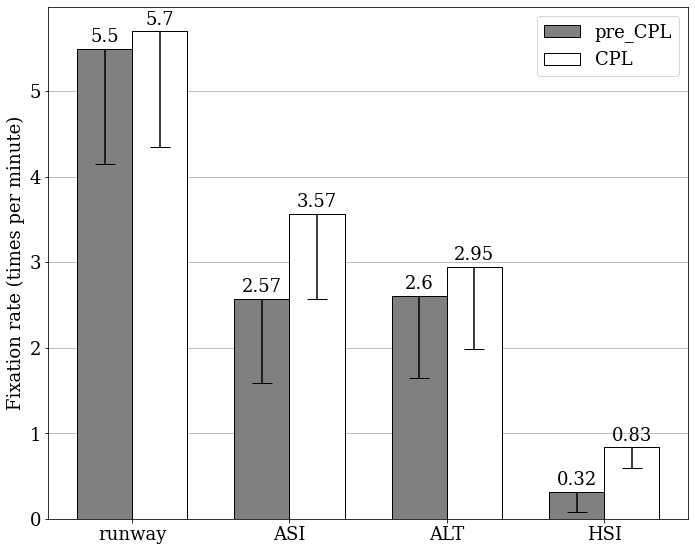

In [45]:
import matplotlib 

font = {'family' : 'serif',
        'size'   : 18}
matplotlib.rc('font', **font)

# cols = ["outside_fix_dur", "ASI_fix_dur", "ALT_fix_dur", "HSI_fix_dur"]
# cols = ["duration_average_runway", "duration_average_asi", "duration_average_alt", "duration_average_hsi"]
cols = ["fix_rate_runway", "fix_rate_asi", "fix_rate_alt", "fix_rate_hsi"]

pre_cpl = []
pre_cpl_std = []
cpl = []
cpl_std = []

pre_cpl_df = df_dwell[df_dwell["group"] == 1]
cpl_df = df_dwell[df_dwell["group"] == 2]

for col in cols:
    pre_cpl.append(np.mean(pre_cpl_df[col]))
    cpl.append(np.mean(cpl_df[col]))
    pre_cpl_std.append(np.std(pre_cpl_df[col]))
    cpl_std.append(np.std(cpl_df[col]))
    
# labels = [col.split("_")[-1] for col in cols]
labels = ["runway", "ASI", "ALT", "HSI"]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
print(pre_cpl_std)
fig, ax = plt.subplots(figsize = (10,8))
rects1 = ax.bar(x - width/2, pre_cpl, width, label='pre_CPL', yerr=[pre_cpl_std, [0,0,0,0]], capsize = 10, fc=(0.5,0.5,0.5,1), ec=(0,0,0,1))
rects2 = ax.bar(x + width/2, cpl, width, label='CPL', yerr=[pre_cpl_std, [0,0,0,0]], capsize = 10, fc=(1,1,1,1), ec=(0,0,0,1))

# bars = [rects1, rects2]
# # patterns = ('-', '+', 'x', '\\', '*', 'o', 'O', '.')
# patterns = ('-', '\\')
# for bar, pattern in zip(bars, patterns):
#     bar.set_hatch(pattern)

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Mean fixation duration (s)')
ax.set_ylabel('Fixation rate (times per minute)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(np.round(height,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.grid(axis='y')
ax.set_axisbelow(True)
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.savefig("b.png")

In [28]:
df_dwell[cols]

,duration_percentage_runway,duration_percentage_asi,duration_percentage_alt,duration_percentage_hsi
0,0.744033,0.080266,0.125761,0.000000
1,0.617805,0.105859,0.167247,0.003953
2,0.701955,0.111441,0.103173,0.011363
3,0.466128,0.082198,0.243739,0.000000
4,0.648992,0.115301,0.092202,0.014047
5,0.726277,0.123815,0.048556,0.011535
6,0.759193,0.111613,0.044123,0.009620
7,0.647703,0.121311,0.083999,0.013325
8,0.779150,0.081104,0.036443,0.003521
9,0.640024,0.206546,0.094950,0.011731


[[67.6803896  64.64242373]
 [10.36564133 15.00919593]
 [10.50268907 10.37748719]
 [ 1.7484831   2.20143342]
 [ 9.70279689  7.76945972]]


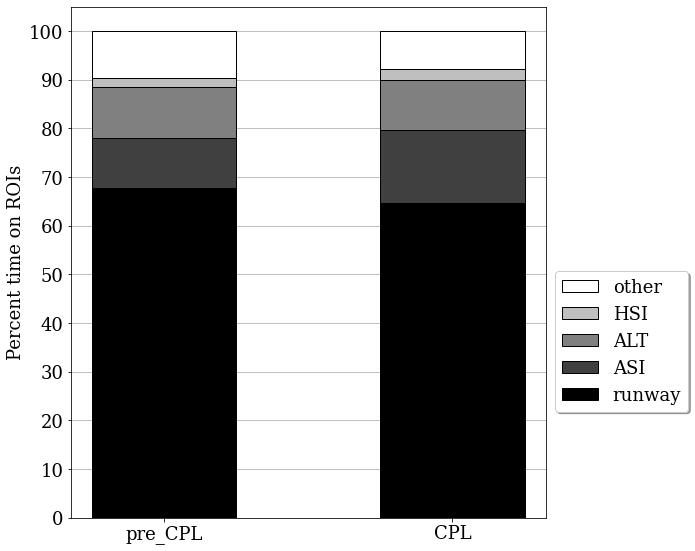

In [38]:
import matplotlib 

font = {'family' : 'serif',
        'size'   : 18}
matplotlib.rc('font', **font)

cols = ["duration_percentage_runway", "duration_percentage_asi", "duration_percentage_alt", "duration_percentage_hsi"]
pre_cpl = []
cpl = []

pre_cpl_df = df_dwell[df_dwell["group"] == 1]
cpl_df = df_dwell[df_dwell["group"] == 2]

for col in cols:
    pre_cpl.append(np.mean(pre_cpl_df[col])*100)
    cpl.append(np.mean(cpl_df[col])*100)

cpl[3] = cpl[3]
pre_cpl[3] = pre_cpl[3]+1

    
pre_cpl.append(100 - sum(pre_cpl))
cpl.append(100 - sum(cpl))

data = np.array([pre_cpl, cpl]).T
print(data)
ind = np.arange(2)    # the x locations for the groups
width = 0.1       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize = (10, 8))

ind = [0.3, 0.5]
p1 = ax.bar(ind, data[0], width, label='runway', fc=(0,0,0,1), ec=(0,0,0,1))
p2 = ax.bar(ind, data[1], width, bottom=data[0], label='ASI', fc=(0.25,0.25,0.25,1), ec=(0,0,0,1))
p3 = ax.bar(ind, data[2], width, bottom=[i+j for i,j in zip(data[0], data[1])], label='ALT', fc=(0.5,0.5,0.5,1), ec=(0,0,0,1))
p4 = ax.bar(ind, data[3], width, bottom=[i+j+k for i,j,k in zip(data[0], data[1], data[2])], label='HSI', fc=(0.75,0.75,0.75,1), ec=(0,0,0,1))
p5 = ax.bar(ind, data[4], width, bottom=[i+j+k+l for i,j,k,l in zip(data[0], data[1], data[2], data[3])], label='other', fc=(1,1,1,1), ec=(0,0,0,1))

ax.grid(axis='y')
ax.set_ylabel('Percent time on ROIs')
ax.set_xticks((0.3, 0.5))
ax.set_xticklabels(['pre_CPL', 'CPL'])
ax.set_yticks(np.arange(0, 101, 10))
ax.set_axisbelow(True)

handles, labels = ax.get_legend_handles_labels()
order = [4,3,2,1,0]
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
plt.tight_layout()

# ax.legend(loc='best',bbox_to_anchor=(1, 0.5),
#           ncol=1, fancybox=True, shadow=True)

fig.savefig("a.png")

# n-gram analysis

In [3]:
documents = mongo.find({"trial":2})
d = defaultdict(list)

subseqcount_group = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

for document in documents:
    print("trial: {}, group: {}, pID: {}".format(document["trial"], document["group"], document["pID"]))
    if document["trial"] == 4:
        continue
        
    d['pID'].append(document["pID"])
    d['group'].append(document["group"])
    d['trial'].append(document["trial"])
    
    d_data = document["data"]
    df_data = pd.DataFrame(d_data)
    df_data = fixation.merge_consecutive_fixations_in_same_roi(df_data)
    transitions, L = pair_transition_analysis.encode_transition(df_data["roi"], "fix")
    
    group = document["group"]

    for ngram_length in range(3,5):
        subseqcount = defaultdict(int)

        for i in range(len(transitions)-ngram_length + 1):
            substring = transitions[i:i+ngram_length]
            subseqcount[substring] += 1
            subseqcount_group[group][ngram_length][substring] += 1
            
#             if subseqcount_group[group].get(substring):
#                 subseqcount_group[group][substring] += 1
#             else:
#                 subseqcount_group[group][substring] = 1


#             if subseqcount[substring]:
#                 subseqcount[substring] += 1
# #                 subseqcount[substring]["duration"] += df_data.iloc[i:i+ngram_length]["duration"].sum()
#             else:
#                 subseqcount[substring] = 1
# #                 subseqcount[substring]["duration"] = df_data.iloc[i:i+ngram_length]["duration"].sum()

        sorted_subseqcount = {k: v for k, v in sorted(subseqcount.items(), key=lambda item: item[1], reverse=True)}
        more_than_2_time_seq = {k: v for k, v in subseqcount.items() if v >= 2}
        count_of_most_seq = 0
        N_unique_seq = 0
#         print(document["group"], document["pID"])
        if len(subseqcount.values())>0:
            
            count_of_most_seq = max(subseqcount.values())/sum(subseqcount.values())
            N_unique_seq = len(subseqcount.keys())

        N_unique_seq_more_than_2_times = 0
        if len(more_than_2_time_seq.values())>0:
            N_unique_seq_more_than_2_times = len(more_than_2_time_seq.keys())
            
        sum_pattern_count = sum(more_than_2_time_seq.values())
        freq_pattern = np.array(list(subseqcount.values()))/sum_pattern_count
        ss_freq = sum(np.square(freq_pattern))

        d["N_unique_seq_{}".format(ngram_length)].append(N_unique_seq)
        d["ss_freq_{}".format(ngram_length)].append(ss_freq)
        d["count_of_most_seq_{}".format(ngram_length)].append(count_of_most_seq)
        d["N_unique_seq_more_than_2_times_{}".format(ngram_length)].append(N_unique_seq_more_than_2_times)
        d["mean_repetition_{}".format(ngram_length)].append(np.mean(list(more_than_2_time_seq.values())))
        

trial: 2, group: 2, pID: 001
trial: 2, group: 2, pID: 002
trial: 2, group: 1, pID: 003
trial: 2, group: 1, pID: 004
trial: 2, group: 2, pID: 005
trial: 2, group: 2, pID: 006
trial: 2, group: 1, pID: 007
trial: 2, group: 1, pID: 008
trial: 2, group: 2, pID: 009
trial: 2, group: 1, pID: 010
trial: 2, group: 2, pID: 011
trial: 2, group: 2, pID: 014
trial: 2, group: 2, pID: 015
trial: 2, group: 2, pID: 016
trial: 2, group: 2, pID: 017
trial: 2, group: 2, pID: 019
trial: 2, group: 2, pID: 020
trial: 2, group: 2, pID: 021
trial: 2, group: 2, pID: 022
trial: 2, group: 1, pID: 023
trial: 2, group: 2, pID: 025
trial: 2, group: 1, pID: 027
trial: 2, group: 1, pID: 029
trial: 2, group: 1, pID: 032


c:\users\work\anaconda3\envs\kia\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in true_divide
c:\users\work\anaconda3\envs\kia\lib\site-packages\numpy\core\fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\work\anaconda3\envs\kia\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [125]:
documents = mongo.find({"trial":2})
d = defaultdict(list)

subseqcount_group = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

for document in documents:
    print("trial: {}, group: {}, pID: {}".format(document["trial"], document["group"], document["pID"]))
    if document["trial"] == 4:
        continue
        
    d['pID'].append(document["pID"])
    d['group'].append(document["group"])
    d['trial'].append(document["trial"])
    
    d_data = document["data"]
    df_data = pd.DataFrame(d_data)
    df_data = fixation.merge_consecutive_fixations_in_same_roi(df_data)
    transitions, L = pair_transition_analysis.encode_transition(df_data["roi"], "fix")
    
    group = document["group"]
    pID = document["pID"]

    for ngram_length in range(3,5):
        subseqcount = defaultdict(int)

        for i in range(len(transitions)-ngram_length + 1):
            substring = transitions[i:i+ngram_length]
            subseqcount[substring] += 1
        
        filtered_subseq = filter_subseq(subseqcount)
        subseqcount_group[pID][ngram_length] = filtered_subseq
        D = dominance_level(filtered_subseq)
        d[ngram_length].append(D)

#         sorted_subseqcount = {k: v for k, v in sorted(subseqcount.items(), key=lambda item: item[1], reverse=True)}
#         more_than_2_time_seq = {k: v for k, v in subseqcount.items() if v >= 2}

trial: 2, group: 2, pID: 001
[0.5        0.17241379 0.0862069  0.05172414 0.05172414 0.03448276
 0.03448276 0.03448276 0.03448276]
[0.92592593 0.07407407]
trial: 2, group: 2, pID: 002
[0.23809524 0.14285714 0.12698413 0.12698413 0.07936508 0.06349206
 0.06349206 0.04761905 0.04761905 0.03174603 0.03174603]
[0.31034483 0.24137931 0.13793103 0.10344828 0.10344828 0.10344828]
trial: 2, group: 1, pID: 003
[0.38709677 0.25806452 0.12903226 0.09677419 0.06451613 0.06451613]
[0.5 0.3 0.1 0.1]
trial: 2, group: 1, pID: 004
[0.2238806  0.13432836 0.07462687 0.07462687 0.07462687 0.05970149
 0.04477612 0.04477612 0.04477612 0.04477612 0.02985075 0.02985075
 0.02985075 0.02985075 0.02985075 0.02985075]
[0.27272727 0.27272727 0.18181818 0.13636364 0.13636364]
trial: 2, group: 2, pID: 005
[0.3255814  0.18604651 0.11627907 0.11627907 0.09302326 0.09302326
 0.06976744]
[0.44444444 0.27777778 0.16666667 0.11111111]
trial: 2, group: 2, pID: 006
[0.46153846 0.17948718 0.12820513 0.1025641  0.07692308 0.0

In [138]:
subseqcount_group["003"]

defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
            {3: {'XEX': 12, 'BXB': 8, 'XPX': 4, 'XBP': 3, 'EXP': 2, 'PXE': 2},
             4: {'EXEX': 10, 'BXBX': 6, 'XBPX': 2, 'EXPX': 2}})

In [127]:
def filter_subseq(dict_subseqcount):
    d = dict_subseqcount
    d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)}
    d = {k: v for k, v in d.items() if v >= 2}
    list_subseq = list(d.keys())
    processed = []
    exclude = []
    for i, p in enumerate(list_subseq):
        if p in processed:
            continue
            
        processed.append(p)
            
        if "Z" in p:
            exclude.append(p)
            continue

        for j, p_next in enumerate(list_subseq[i+1:]):
            if p_next in ''.join(i for i, _ in itertools.groupby(p*2)):
                exclude.append(p_next)
                
        if len(p) > 3:
            for j, p_next in enumerate(list_subseq[i+1:]):
                if p[1:] in p_next or p[:-1] in p_next:
                    exclude.append(p_next)
                    
        processed.append(p)

    include = [v for v in list_subseq if v not in exclude]
    d_res = {}
    for k in include:
        d_res[k] = d[k]
    
    return d_res

In [128]:
def dominance_level(dict_subseqcount):
    d = dict_subseqcount
    counts = list(d.values())
    counts = np.array(counts)
    prob = counts/sum(counts)
    print(prob)
    max_prob = max(prob)
    D = np.square(max_prob - prob).mean()
    return D

In [139]:
dominance_level(subseqcount_group["002"][3])

[0.23809524 0.14285714 0.12698413 0.12698413 0.07936508 0.06349206
 0.06349206 0.04761905 0.04761905 0.03174603 0.03174603]


0.025241072860120475

In [129]:
df_res = pd.DataFrame(d).sort_values(["trial", "group","pID"]).dropna().reset_index().drop(columns=["index"])

In [130]:
df_res

,pID,group,trial,3,4
0,003,1,2,0.062608,0.090000
1,004,1,2,0.028500,0.009091
2,007,1,2,0.072485,0.165000
3,008,1,2,0.011662,0.000000
4,010,1,2,0.012773,0.012245
5,023,1,2,0.096492,0.279123
6,027,1,2,0.020140,0.006173
7,029,1,2,0.025184,0.028600
8,032,1,2,0.028214,0.066667
9,001,2,2,0.171918,0.362826


In [131]:
hypothesis_testing.hypothesis_test_group(df_res, trial = 2)

test between group 1 and group 2 in trial 2
Number of samples in group 1: 9
Number of samples in group 2: 15
test: t, effect size: cohen


,ROI,levene: l-value,levene: p-value,t: t-value,t: p-value,ES (cohen)
0,3,0.687269,0.415999,-1.312958,0.202728,0.553592
1,4,0.020317,0.887952,-0.825949,0.417700,0.348251


In [38]:
for i in range(3,7):
    print("N_unique_seq_{}: g1: {} +- {}, g2: {}+-{}".format(i, g1["ss_freq_{}".format(i)].mean()/i,  g1["ss_freq_{}".format(i)].std()/i,
                                                    g2["ss_freq_{}".format(i)].mean()/i,  g2["ss_freq_{}".format(i)].std()/i))

N_unique_seq_3: g1: 0.027653412274385655 +- 0.009005813508580431, g2: 0.028814446902841826+-0.012806201196708264
N_unique_seq_4: g1: 0.023614709936905676 +- 0.011328297820905105, g2: 0.025879625659861995+-0.013766783601425083
N_unique_seq_5: g1: 0.03814995842196857 +- 0.02077276357501478, g2: 0.03743423457906004+-0.02096056315947464
N_unique_seq_6: g1: 0.15008683123233982 +- 0.1630826095427169, g2: 0.09298296311631671+-0.09326097722586459


In [84]:
for i in range(3,7):
    print("N_unique_seq_{}: g1: {} +- {}, g2: {}+-{}".format(i, g1["N_unique_seq_more_than_2_times_{}".format(i)].mean()/i,  g1["N_unique_seq_more_than_2_times_{}".format(i)].std()/i,
                                                            g2["N_unique_seq_more_than_2_times_{}".format(i)].mean()/i,  g2["N_unique_seq_more_than_2_times_{}".format(i)].std()/i))

N_unique_seq_3: g1: 7.458333333333333 +- 2.8224581203748342, g2: 7.533333333333334+-2.1887156486113475
N_unique_seq_4: g1: 5.21875 +- 2.1689262484991443, g2: 4.933333333333334+-1.8719419506669182
N_unique_seq_5: g1: 2.8 +- 1.397957694025722, g2: 2.7466666666666666+-1.1963436359332946
N_unique_seq_6: g1: 1.125 +- 0.6346477588219924, g2: 1.5+-0.7993052538854531


In [13]:
from scipy import stats

t_score = stats.ttest_ind_from_stats(mean1=0.27, std1=0.15, nobs1=9, \
                               mean2=0.53, std2=0.24, nobs2=15, \
                               equal_var=True)
t_score


Ttest_indResult(statistic=-2.9121880804746105, pvalue=0.00807614408733926)

In [16]:
import numpy as np

num_samples = 15
desired_mean = 0.53
desired_std_dev = 0.24

samples = np.random.normal(loc=0.0, scale=desired_std_dev, size=num_samples)

actual_mean = np.mean(samples)
actual_std = np.std(samples)
print("Initial samples stats   : mean = {:.4f} stdv = {:.4f}".format(actual_mean, actual_std))

zero_mean_samples = samples - (actual_mean)

zero_mean_mean = np.mean(zero_mean_samples)
zero_mean_std = np.std(zero_mean_samples)
print("True zero samples stats : mean = {:.4f} stdv = {:.4f}".format(zero_mean_mean, zero_mean_std))

scaled_samples = zero_mean_samples * (desired_std_dev/zero_mean_std)
scaled_mean = np.mean(scaled_samples)
scaled_std = np.std(scaled_samples)
print("Scaled samples stats    : mean = {:.4f} stdv = {:.4f}".format(scaled_mean, scaled_std))

final_samples = scaled_samples + desired_mean
final_mean = np.mean(final_samples)
final_std = np.std(final_samples)


Initial samples stats   : mean = 0.0855 stdv = 0.2626
True zero samples stats : mean = 0.0000 stdv = 0.2626
Scaled samples stats    : mean = 0.0000 stdv = 0.2400


In [17]:
final_samples

array([0.41396197, 0.71746627, 0.11414781, 1.00174642, 0.41069279,
       0.75372789, 0.33264052, 0.44070235, 0.78364003, 0.56598989,
       0.73486458, 0.30423746, 0.52947094, 0.67573176, 0.17097932])

In [111]:
x41 = []
x42 = []

In [151]:
x31 = [9, 3, 4, 8, 7, 11, 3, 9, 8]
x32 = [5, 1,6,5,6,3,4,6,8,2,6,7,5,5,3]
print("g1 M, SD ", np.mean(x31), np.std(x31))
print("g2 M, SD", np.mean(x32), np.std(x32))
print(stats.ttest_ind(x31, x32))
print(stats.levene(x31, x32))
print("ES", anova.EffectSize(x31,x32))

g1 M, SD  6.888888888888889 2.7261875880856214
g2 M, SD 4.8 1.833030277982336
Ttest_indResult(statistic=2.145653095743924, pvalue=0.043191868844187596)
LeveneResult(statistic=1.5168211120064468, pvalue=0.23110420433276924)
ES 0.17305131218174702


In [152]:
x41 = [7, 0, 3, 5, 6, 8, 1, 6, 5]
x42 = [4, 0, 3, 0, 2, 4, 0, 6, 1, 2, 3, 4, 5, 4, 0]
print("g1 M, SD ", np.mean(x41), np.std(x41))
print("g2 M, SD", np.mean(x42), np.std(x42))
print(stats.ttest_ind(x41, x42))
print(stats.levene(x41, x42))
print("ES", anova.EffectSize(x41,x42))

g1 M, SD  4.555555555555555 2.543449587168799
g2 M, SD 2.533333333333333 1.9275776393067947
Ttest_indResult(statistic=2.107335731333615, pvalue=0.0467145241481979)
LeveneResult(statistic=0.33266129032258057, pvalue=0.5699513508525138)
ES 0.1679545685021803


In [155]:
df_res[["pID", "group"]]

,pID,group
0,003,1
1,004,1
2,007,1
3,010,1
4,023,1
5,027,1
6,029,1
7,032,1
8,001,2
9,002,2


In [145]:
np.array(x41.extend(x42))

array(None, dtype=object)

In [153]:
pd.DataFrame({"unique_3": x31 + x32,
              "unique_4":x41 + x42})

,unique_3,unique_4
0,9,7
1,3,0
2,4,3
3,8,5
4,7,6
5,11,8
6,3,1
7,9,6
8,8,5
9,5,4


In [39]:
def ss_frequencies(arr):
    arr_freq = np.array(arr)/sum(arr)
    ss_freq = sum(np.square(arr_freq))
    return ss_freq

In [42]:
x31 = [21, 7, 5, 5, 4, 4, 3]
x32 = [15, 12, 8, 5, 7, 5, 4]

In [44]:
print(ss_frequencies(x31), ss_frequencies(x32))

0.2419825072886297 0.17474489795918366


In [9]:
import anova

In [10]:
# dominance 3
x31 = [0.1235326 , 0.05465944, 0.00951633, 0.23213826, 0.43568024,
       0.18887091, 0.26745887, 0.43291954, 0.2352238 ]
x32 = [0.49786056, 0.30533778, 0.5054069 , 0.40756063, 0.25322919,
       0.18045012, 0.33435727, 0.44736973, 0.52763621, 0.26127286,
       0.47002627, 0.25161033, 0.13575451, 0.48529045, 0.18683719]

print("g1 M, SD ", np.mean(x31), np.std(x31))
print("g2 M, SD", np.mean(x32), np.std(x32))
print(stats.ttest_ind(x31, x32))
print(stats.levene(x31, x32))
print("ES", anova.EffectSize(x31,x32))

g1 M, SD  0.21999999888888888 0.13999999914642233
g2 M, SD 0.35 0.13000000003406395
Ttest_indResult(statistic=-2.205627857134636, pvalue=0.03815799437738026)
LeveneResult(statistic=0.055720474829801865, pvalue=0.8155761870353176)
ES 0.18108436639987857


In [18]:
# dominance 4
x41 = [0.33987412, 0.11685512, 0.54621883, 0.02076503, 0.26887855,
       0.14973279, 0.24819192, 0.39108929, 0.34839436]
x42 = [0.41396197, 0.71746627, 0.11414781, 1.00174642, 0.41069279,
       0.75372789, 0.33264052, 0.44070235, 0.78364003, 0.56598989,
       0.73486458, 0.30423746, 0.52947094, 0.67573176, 0.17097932]

print("g1 M, SD ", np.mean(x41), np.std(x41))
print("g2 M, SD",  np.mean(x42), np.std(x42))
print(stats.ttest_ind(x41, x42))
print(stats.levene(x41, x42))
print("ES", anova.EffectSize(x41,x42))

g1 M, SD  0.2700000011111111 0.1500000010631649
g2 M, SD 0.53 0.2400000001832111
Ttest_indResult(statistic=-2.8006930854137266, pvalue=0.010419153941901179)
LeveneResult(statistic=2.6290047895323547, pvalue=0.11917299212713069)
ES 0.2628304796979627


In [68]:
#exp
x32 =[330.50590937, 186.74702417, 102.66444388, 245.99720662,
       148.09773501, 242.65979636, 282.06391234, 238.30040571,
       418.22832453, 188.05100993, 182.14450097, 317.49768601,
       191.98208521, 204.40091383, 311.65904607]

x31 =[138.15663438,  30.60022381,  60.2892445 , 135.12954972,
        -3.00240379,  66.66649826, -10.12049143,  80.6838514 ,
        77.59689314]

print("g1 M, SD ", np.mean(x31), np.std(x31))
print("g2 M, SD", np.mean(x32), np.std(x32))
print(stats.ttest_ind(x32, x31))
print(stats.levene(x31, x32))
print("ES", anova.EffectSize(x31,x32))

g1 M, SD  63.99999999888889 49.59999999876028
g2 M, SD 239.40000000066667 78.59999999843619
Ttest_indResult(statistic=5.7585182246344475, pvalue=8.584359844006004e-06)
LeveneResult(statistic=1.6684783510562224, pvalue=0.20986852039018203)
ES 0.601164108736512
